Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.8889 - loss: 0.3566 - val_accuracy: 0.9852 - val_loss: 0.0459
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.9851 - loss: 0.0476 - val_accuracy: 0.9839 - val_loss: 0.0479
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9896 - loss: 0.0333 - val_accuracy: 0.9893 - val_loss: 0.0317
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9923 - loss: 0.0248 - val_accuracy: 0.9901 - val_loss: 0.0309
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9940 - loss: 0.0188 - val_accuracy: 0.9916 - val_loss: 0.0316
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9879 - loss: 0.0437
Test Accuracy:0.991599977016449


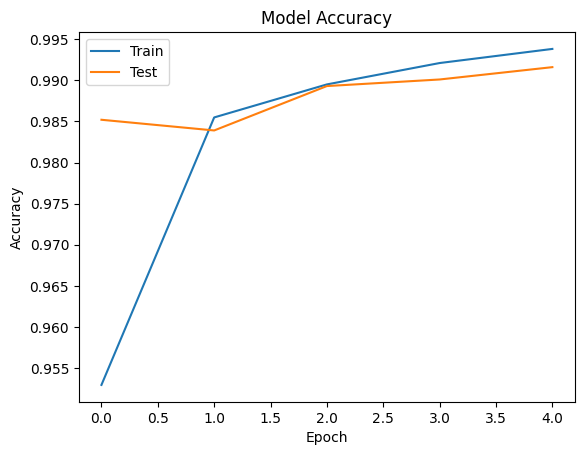

Test Loss:0.031635235995054245


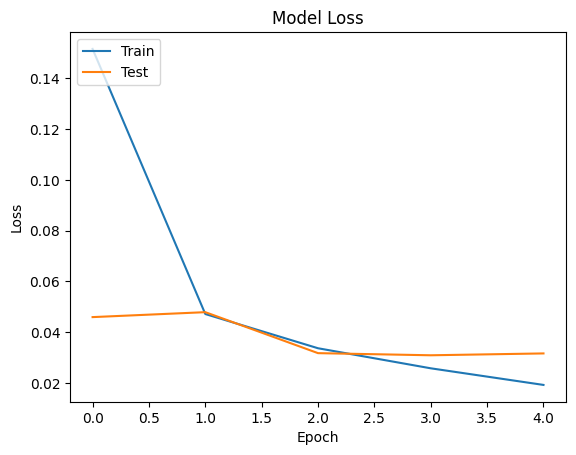

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

(train_imgs,train_labels),(test_imgs,test_labels)=datasets.mnist.load_data()
train_imgs=train_imgs.reshape((train_imgs.shape[0],28,28,1)).astype('float32')/255
test_imgs=test_imgs.reshape((test_imgs.shape[0],28,28,1)).astype('float32')/255

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist=model.fit(train_imgs,train_labels,epochs=5,validation_data=(test_imgs,test_labels))
test_loss,test_acc=model.evaluate(test_imgs,test_labels)
print(f'Test Accuracy:{test_acc}')

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

print(f'Test Loss:{test_loss}')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

Test Loss:0.030825838446617126


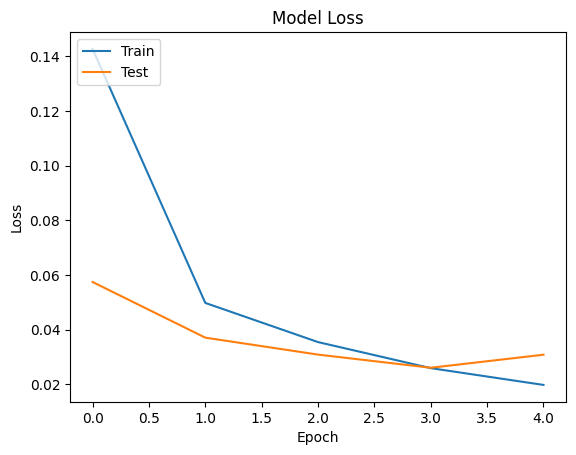

In [ ]:
print(f'Test Loss:{test_loss}')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()